In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline

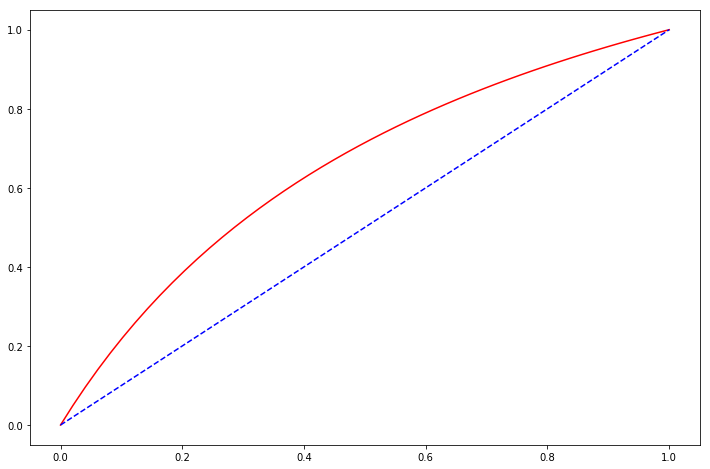

In [36]:
xd=0.974 #benzene
xb=0.0235  #benzene
zf=0.44   #benzene 
R=3.5   
q=0.33
small=1e-5 #avoid having zero in division 

#molecular weight of benzene and toluene are equal, then the mass fraction and molar fraction are equal (nearly)

# Équilibre mélange idéal
#
def y_45(x):   #y=x#

    return x

def y_e(x):    #equilibrium curve#
    alpha=2.5  #need to be checked (1-chemsep, 2-interpolation) 
    return alpha*x/(1+(alpha-1)*x)

def y_r(x):    #rectifying 

    return (R/(R+1))*x+1/(R+1)*xd

def y_q(x):   #feed line


    return q/(q-1+small)*x-zf/(q-1+small)

# 0.9 et 0.1 comme fractions du produit au haut et au bas de la colonne


x = np.linspace(0,1)
# Tracer
plt.figure(figsize = (12,8))
plt.plot(x,y_e(x),'r');
plt.plot(x,y_45(x),'b--');


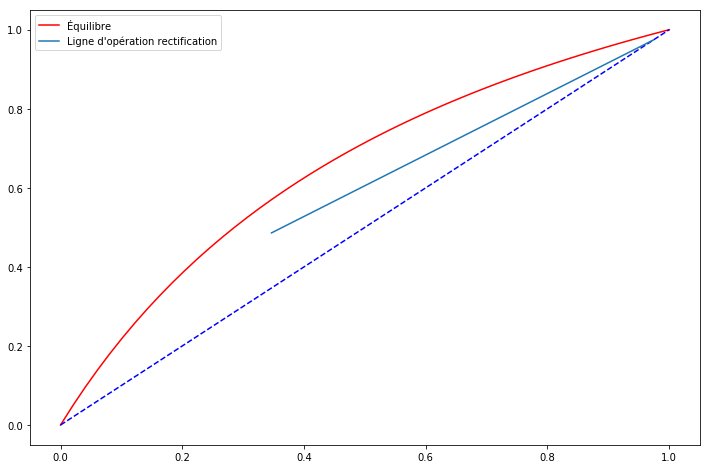

In [37]:

y2_r = lambda x: y_r(x)-y_q(x)  #to find (x-coordinate) for 2nd point of the rectification line 

x2=fsolve(y2_r, 0.1)      #x-coordinate for 2nd point of the rectification line


plt.figure(figsize = (12,8))
plt.plot(x,y_e(x),'r',label='Équilibre')

plt.plot(x,y_45(x),'b--');
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'opération rectification");     
plt.legend();


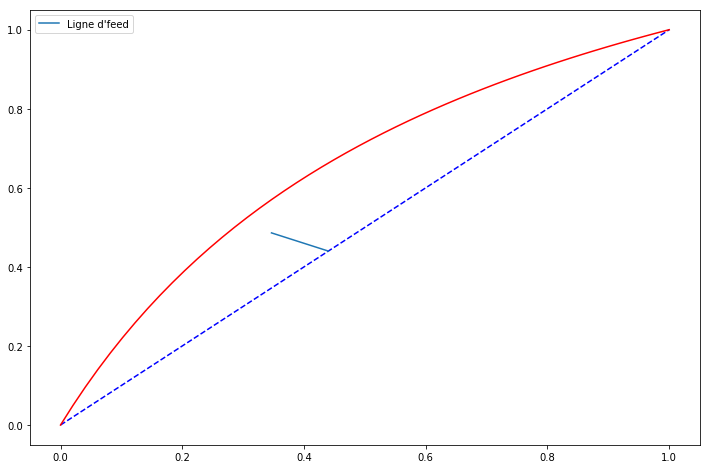

In [38]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'feed");    
plt.legend();

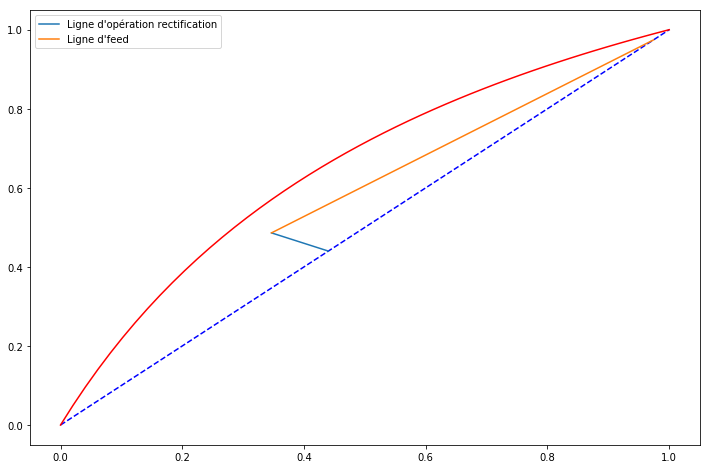

In [39]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.legend();

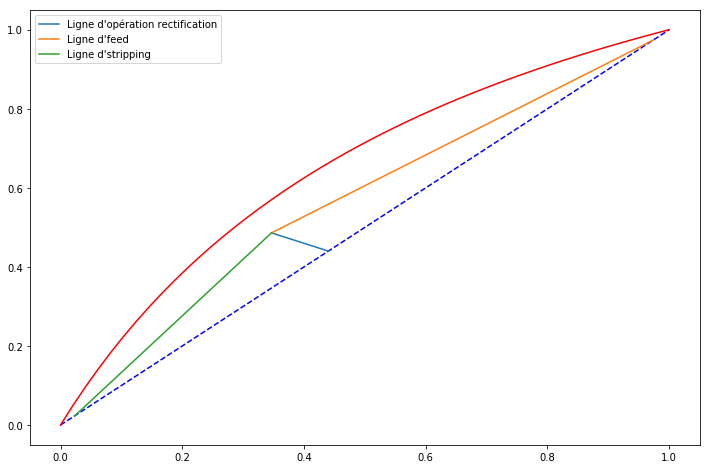

In [40]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.plot([xb,x2],[y_45(xb),y_q(x2)],label="Ligne d'stripping");  
plt.legend();

def y_stripping(x):
    m=(y_45(xb)-y_q(x2))/(xb-x2)
    return m*(x-xb)+y_45(xb)

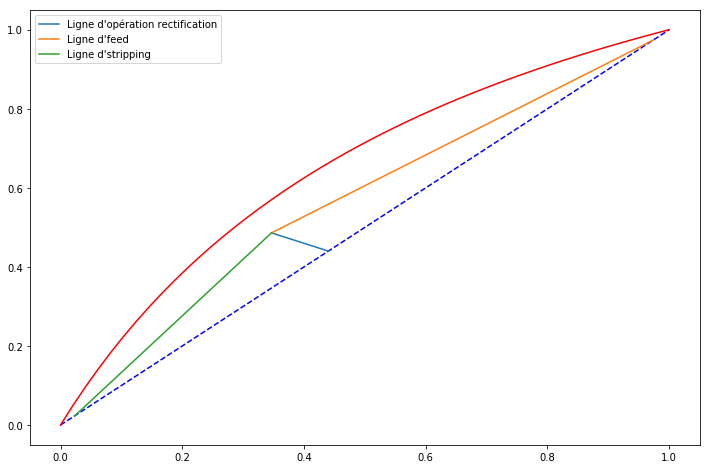

In [41]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.plot([xb,x2],[y_45(xb),y_stripping(x2)],label="Ligne d'stripping");  
plt.legend();



13


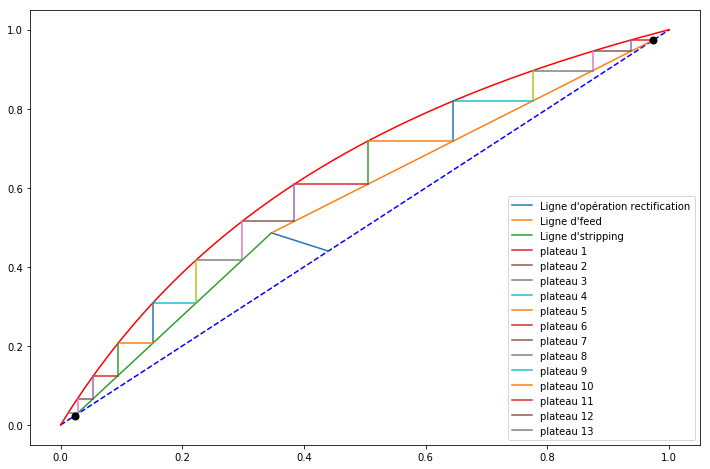

In [42]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.plot([xb,x2],[y_45(xb),y_q(x2)],label="Ligne d'stripping");  
plt.legend();

#initialization 
x_1=xd
y_1=y_r(xd)
x_3=xd
y_3=xd

nTray = 0


        
while x_3 > xb:
    
    nTray += 1

    y2_r = lambda x: y_e(x)-y_r(x_1)
    x_2=fsolve(y2_r, 0.0005)
    y_2=y_e(x_2)
    
    if (x_1<x2):
        
        y2_r = lambda x: y_e(x)-y_stripping(x_1)
        x_2=fsolve(y2_r, 0.0005)
        y_2=y_e(x_2)

    x_3=x_2
    y_3=y_r(x_2)
    
    if (x_2<x2):
        
        x_3=x_2
        y_3=y_stripping(x_2)
        
    plt.plot([x_1,x_2],[y_1,y_2],label="plateau "+str(nTray))
    
    if (x_3>xb):
        plt.plot([x_2,x_3],[y_2,y_3])
    
    x_1=x_3
    y_1=y_3   
plt.legend();
plt.plot(xd,y_45(xd),'ko',ms=7)
plt.plot(xb,y_45(xb),'ko',ms=7)

print(nTray)
